# Example of Waveform Fitting of Receiver Functions

This notebook demonstrates waveform fitting of receiver function to retrieve Moho structure based on [rfsed](https://github.com/akinremisa/rfsed) package 

The required functions are first imported

In [1]:
#%% Example of Waveform Fitting 
import os 
from os.path import exists
from os import mkdir
import numpy as np
from glob import glob
from rf import read_rf, RFStream
from rfsed.WaveformFitting import WaveformFitting, PlotWaveformFitting    
from rfsed.util import rfMoho_example, rfSed_example, save_plot


The path to save the results is defined

In [2]:
#----------------------------------------------------------
savedir=save_plot()
savepath = savedir + '/WaveformFitting/'
if not os.path.exists(savepath):  # create data folder if necessary
    os.mkdir(savepath)

The receiver function data is defined and the Moho parameters.

In [5]:
rfstream= rfMoho_example()
preonset=10
VpSed=3.3
HSed=1.8
VpCrust = 6.9
gaussian=1.25
rayp=0.04
# KMoho= np.linspace(1.65,1.95,121)
# HMoho=np.linspace(20,50,201)
# Option to use smaller grid search discretization for faster testing
KMoho= np.linspace(1.65,1.95,20)
HMoho=np.linspace(20,50,20)
wtCorr, wtRMSE, wtPG = [0.5, 0.3, 0.2] #wtCorr+wtRMSE+wtPG=1.0
format='pdf'

The waveform fitting analysis is performed and the results are visualised and saved

Best Model from Correlation Coefficient: Moho at 32.63 km with Vp/Vs of 1.71
Best Model from RMSE: Moho at 34.21 km with Vp/Vs of 1.65
Best Model from PG: Moho at 21.58 km with Vp/Vs of 1.84
Best Model from Overall Goodness of Fit: Moho at 32.63 km with Vp/Vs of 1.68


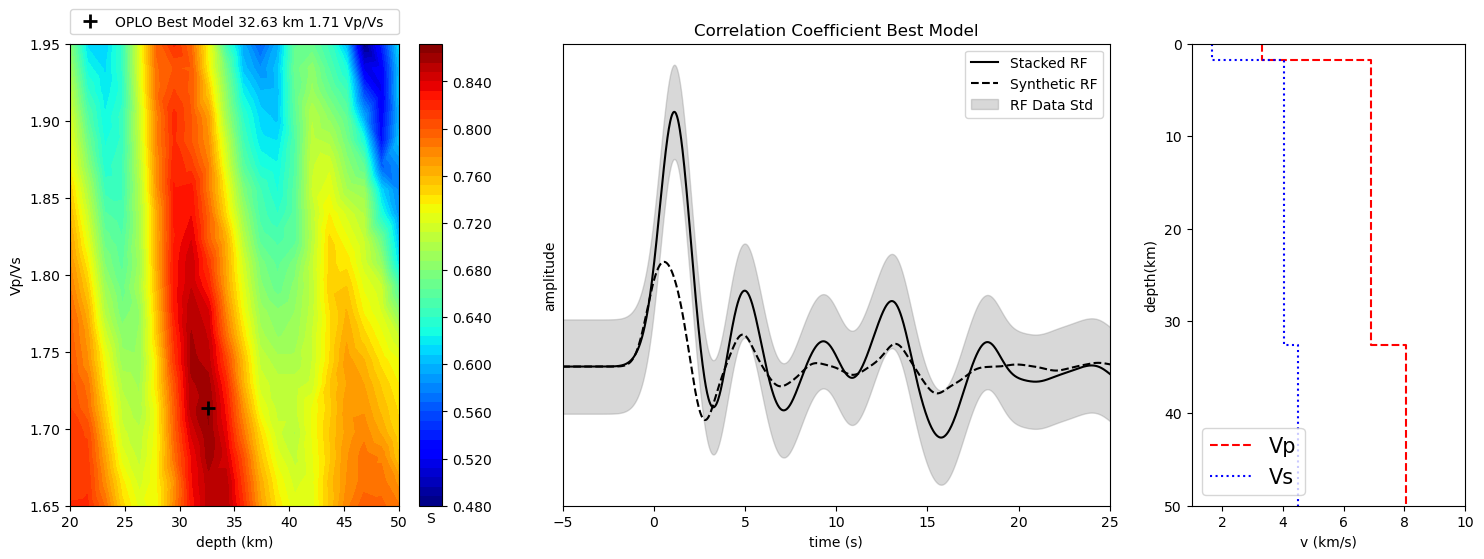

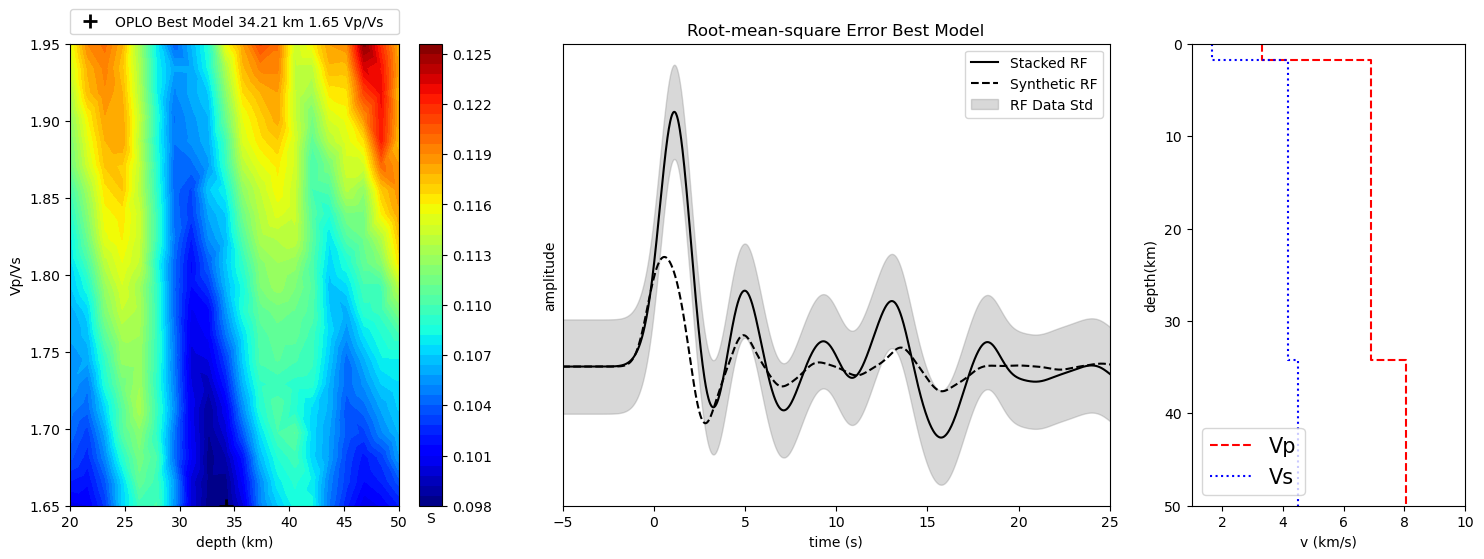

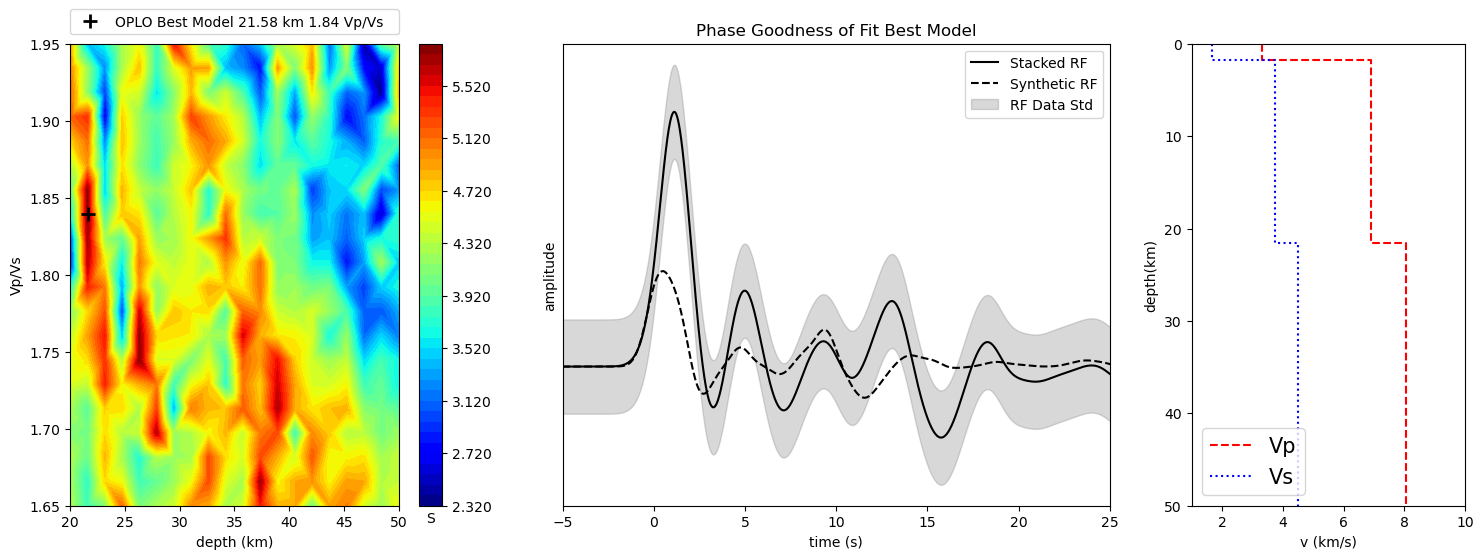

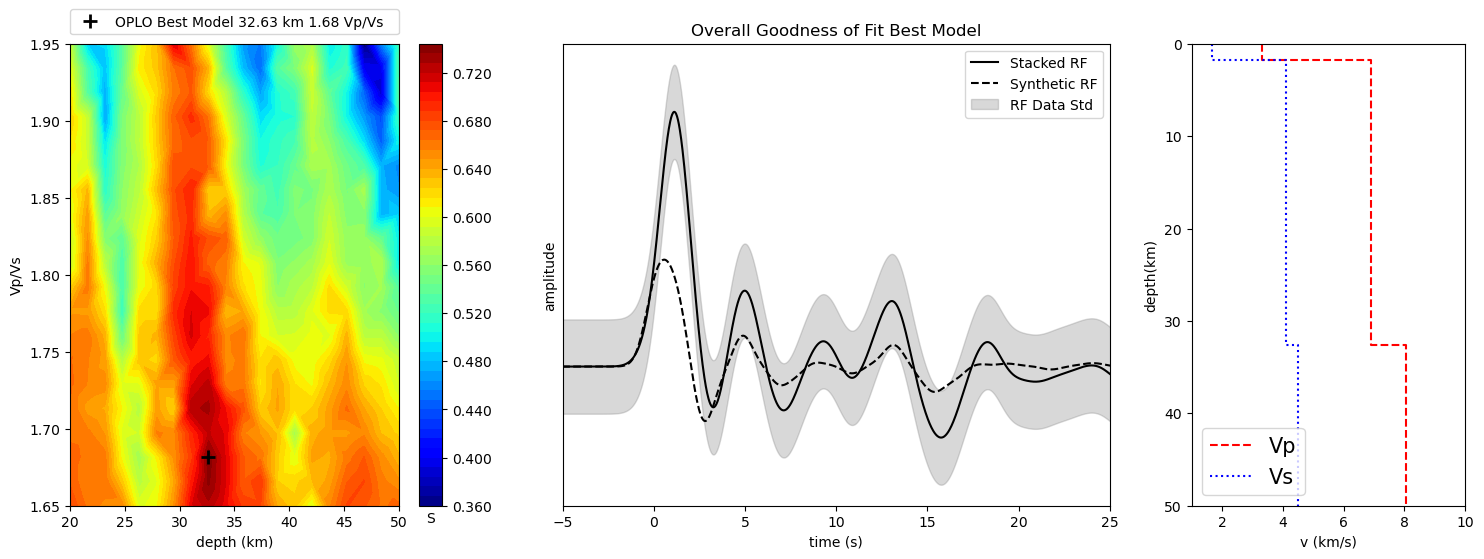

In [6]:
#%%
FittingResult = WaveformFitting(rfstream, preonset, HSed, VpSed, VpCrust, rayp, KMoho, HMoho, 
                     gaussian, wtCorr, wtRMSE, wtPG, savepath, format)
PlotWaveformFitting(FittingResult, wtCorr, wtRMSE, wtPG, savepath, format)